In [1]:
import tensorflow as tf
import pandas as pd
import re
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:
path = open(r'''C:\Users\user\Documents\formatted\January20171.csv''')
df = pd.read_csv(path, sep=',', header=0  , index_col=False)


In [4]:
df

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1
5,01-21-2017,22:45,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
6,01-21-2017,22:46,72.8,72.9,72.8,95,71.3,0.0,N,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1
7,01-21-2017,22:47,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1
8,01-21-2017,22:48,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,55,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1
9,01-21-2017,22:49,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1


In [5]:
df.head()


,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1


In [6]:
z = df[['Date' , 'Time']]
z['Time'][0:2]


0    22:40
1    22:41
Name: Time, dtype: object

In [7]:
x = df[['Date', 'Time']].values
print(x)
x[3][1]

[['01-21-2017' '22:40']
 ['01-21-2017' '22:41']
 ['01-21-2017' '22:42']
 ...
 ['01-31-2017' '23:58']
 ['01-31-2017' '23:59']
 ['02-01-2017' '00:00']]


'22:43'

In [8]:
def _date_string(x):
    """Convert two integers to a string for the date and time."""

    date = x[0]
    date = re.sub('-' , '' , date)
    print(date)# Date. Example: 19801231
    time = x[1]
    time = re.sub(':' , '' , time)# Time. Example: 1230
    print(time)

    return "{0}{1}".format(date , time)

In [9]:
datestr = df[['Date', 'Time']].apply(_date_string, axis=1)
df['DateTime'] = pd.to_datetime(datestr, format='%m%d%Y%H%M')

01212017
2240
01212017
2241
01212017
2242
01212017
2243
01212017
2244
01212017
2245
01212017
2246
01212017
2247
01212017
2248
01212017
2249
01212017
2250
01212017
2251
01212017
2252
01212017
2253
01212017
2254
01212017
2255
01212017
2256
01212017
2257
01212017
2258
01212017
2259
01212017
2300
01212017
2301
01212017
2302
01212017
2303
01212017
2304
01212017
2305
01212017
2306
01212017
2307
01212017
2308
01212017
2309
01212017
2310
01212017
2311
01212017
2312
01212017
2313
01212017
2314
01212017
2315
01212017
2316
01212017
2317
01212017
2318
01212017
2319
01212017
2320
01212017
2321
01212017
2322
01212017
2323
01212017
2324
01212017
2325
01212017
2326
01212017
2327
01212017
2328
01212017
2329
01212017
2330
01212017
2331
01212017
2332
01212017
2333
01212017
2334
01212017
2335
01212017
2336
01212017
2337
01212017
2338
01212017
2339
01212017
2340
01212017
2341
01212017
2342
01212017
2343
01212017
2344
01212017
2345
01212017
2346
01212017
2347
01212017
2348
01212017
2349
01212017
2350
012120

1102
01222017
1103
01222017
1104
01222017
1105
01222017
1106
01222017
1107
01222017
1108
01222017
1109
01222017
1110
01222017
1111
01222017
1112
01222017
1113
01222017
1114
01222017
1115
01222017
1116
01222017
1117
01222017
1118
01222017
1119
01222017
1120
01222017
1121
01222017
1122
01222017
1123
01222017
1124
01222017
1125
01222017
1126
01222017
1127
01222017
1128
01222017
1129
01222017
1130
01222017
1131
01222017
1132
01222017
1133
01222017
1134
01222017
1135
01222017
1136
01222017
1137
01222017
1138
01222017
1139
01222017
1140
01222017
1141
01222017
1142
01222017
1143
01222017
1144
01222017
1145
01222017
1146
01222017
1147
01222017
1148
01222017
1149
01222017
1150
01222017
1151
01222017
1152
01222017
1153
01222017
1154
01222017
1155
01222017
1156
01222017
1157
01222017
1158
01222017
1159
01222017
1200
01222017
1201
01222017
1202
01222017
1203
01222017
1204
01222017
1205
01222017
1206
01222017
1207
01222017
1208
01222017
1209
01222017
1210
01222017
1211
01222017
1212
01222017
1213
0

0315
01232017
0316
01232017
0317
01232017
0318
01232017
0319
01232017
0320
01232017
0321
01232017
0322
01232017
0323
01232017
0324
01232017
0325
01232017
0326
01232017
0327
01232017
0328
01232017
0329
01232017
0330
01232017
0331
01232017
0332
01232017
0333
01232017
0334
01232017
0335
01232017
0336
01232017
0337
01232017
0338
01232017
0339
01232017
0340
01232017
0341
01232017
0342
01232017
0343
01232017
0344
01232017
0345
01232017
0346
01232017
0347
01232017
0348
01232017
0349
01232017
0350
01232017
0351
01232017
0352
01232017
0353
01232017
0354
01232017
0355
01232017
0356
01232017
0357
01232017
0358
01232017
0359
01232017
0400
01232017
0401
01232017
0402
01232017
0403
01232017
0404
01232017
0405
01232017
0406
01232017
0407
01232017
0408
01232017
0409
01232017
0410
01232017
0411
01232017
0412
01232017
0413
01232017
0414
01232017
0415
01232017
0416
01232017
0417
01232017
0418
01232017
0419
01232017
0420
01232017
0421
01232017
0422
01232017
0423
01232017
0424
01232017
0425
01232017
0426
0

1424
01232017
1425
01232017
1426
01232017
1427
01232017
1428
01232017
1429
01232017
1430
01232017
1431
01232017
1432
01232017
1433
01232017
1434
01232017
1435
01232017
1436
01232017
1437
01232017
1438
01232017
1439
01232017
1440
01232017
1441
01232017
1442
01232017
1443
01232017
1444
01232017
1445
01232017
1446
01232017
1447
01232017
1448
01232017
1449
01232017
1450
01232017
1451
01232017
1452
01232017
1453
01232017
1454
01232017
1455
01232017
1456
01232017
1457
01232017
1458
01232017
1459
01232017
1500
01232017
1501
01232017
1502
01232017
1503
01232017
1504
01232017
1505
01232017
1506
01232017
1507
01232017
1508
01232017
1509
01232017
1510
01232017
1511
01232017
1512
01232017
1513
01232017
1514
01232017
1515
01232017
1516
01232017
1517
01232017
1518
01232017
1519
01232017
1520
01232017
1521
01232017
1522
01232017
1523
01232017
1524
01232017
1525
01232017
1526
01232017
1527
01232017
1528
01232017
1529
01232017
1530
01232017
1531
01232017
1532
01232017
1533
01232017
1534
01232017
1535
0

0417
01242017
0418
01242017
0419
01242017
0420
01242017
0421
01242017
0422
01242017
0423
01242017
0424
01242017
0425
01242017
0426
01242017
0427
01242017
0428
01242017
0429
01242017
0430
01242017
0431
01242017
0432
01242017
0433
01242017
0434
01242017
0435
01242017
0436
01242017
0437
01242017
0438
01242017
0439
01242017
0440
01242017
0441
01242017
0442
01242017
0443
01242017
0444
01242017
0445
01242017
0446
01242017
0447
01242017
0448
01242017
0449
01242017
0450
01242017
0451
01242017
0452
01242017
0453
01242017
0454
01242017
0455
01242017
0456
01242017
0457
01242017
0458
01242017
0459
01242017
0500
01242017
0501
01242017
0502
01242017
0503
01242017
0504
01242017
0505
01242017
0506
01242017
0507
01242017
0508
01242017
0509
01242017
0510
01242017
0511
01242017
0512
01242017
0513
01242017
0514
01242017
0515
01242017
0516
01242017
0517
01242017
0518
01242017
0519
01242017
0520
01242017
0521
01242017
0522
01242017
0523
01242017
0524
01242017
0525
01242017
0526
01242017
0527
01242017
0528
0

01242017
2100
01242017
2101
01242017
2102
01242017
2103
01242017
2104
01242017
2105
01242017
2106
01242017
2107
01242017
2108
01242017
2109
01242017
2110
01242017
2111
01242017
2112
01242017
2113
01242017
2114
01242017
2115
01242017
2116
01242017
2117
01242017
2118
01242017
2119
01242017
2120
01242017
2121
01242017
2122
01242017
2123
01242017
2124
01242017
2125
01242017
2126
01242017
2127
01242017
2128
01242017
2129
01242017
2130
01242017
2131
01242017
2132
01242017
2133
01242017
2134
01242017
2135
01242017
2136
01242017
2137
01242017
2138
01242017
2139
01242017
2140
01242017
2141
01242017
2142
01242017
2143
01242017
2144
01242017
2145
01242017
2146
01242017
2147
01242017
2148
01242017
2149
01242017
2150
01242017
2151
01242017
2152
01242017
2153
01242017
2154
01242017
2155
01242017
2156
01242017
2157
01242017
2158
01242017
2159
01242017
2200
01242017
2201
01242017
2202
01242017
2203
01242017
2204
01242017
2205
01242017
2206
01242017
2207
01242017
2208
01242017
2209
01242017
2210
012420

1339
01252017
1340
01252017
1341
01252017
1342
01252017
1343
01252017
1344
01252017
1345
01252017
1346
01252017
1347
01252017
1348
01252017
1349
01252017
1350
01252017
1351
01252017
1352
01252017
1353
01252017
1354
01252017
1355
01252017
1356
01252017
1357
01252017
1358
01252017
1359
01252017
1400
01252017
1401
01252017
1402
01252017
1403
01252017
1404
01252017
1405
01252017
1406
01252017
1407
01252017
1408
01252017
1409
01252017
1410
01252017
1411
01252017
1412
01252017
1413
01252017
1414
01252017
1415
01252017
1416
01252017
1417
01252017
1418
01252017
1419
01252017
1420
01252017
1421
01252017
1422
01252017
1423
01252017
1424
01252017
1425
01252017
1426
01252017
1427
01252017
1428
01252017
1429
01252017
1430
01252017
1431
01252017
1432
01252017
1433
01252017
1434
01252017
1435
01252017
1436
01252017
1437
01252017
1438
01252017
1439
01252017
1440
01252017
1441
01252017
1442
01252017
1443
01252017
1444
01252017
1445
01252017
1446
01252017
1447
01252017
1448
01252017
1449
01252017
1450
0

01262017
0622
01262017
0623
01262017
0624
01262017
0625
01262017
0626
01262017
0627
01262017
0628
01262017
0629
01262017
0630
01262017
0631
01262017
0632
01262017
0633
01262017
0634
01262017
0635
01262017
0636
01262017
0637
01262017
0638
01262017
0639
01262017
0640
01262017
0641
01262017
0642
01262017
0643
01262017
0644
01262017
0645
01262017
0646
01262017
0647
01262017
0648
01262017
0649
01262017
0650
01262017
0651
01262017
0652
01262017
0653
01262017
0654
01262017
0655
01262017
0656
01262017
0657
01262017
0658
01262017
0659
01262017
0700
01262017
0701
01262017
0702
01262017
0703
01262017
0704
01262017
0705
01262017
0706
01262017
0707
01262017
0708
01262017
0709
01262017
0710
01262017
0711
01262017
0712
01262017
0713
01262017
0714
01262017
0715
01262017
0716
01262017
0717
01262017
0718
01262017
0719
01262017
0720
01262017
0721
01262017
0722
01262017
0723
01262017
0724
01262017
0725
01262017
0726
01262017
0727
01262017
0728
01262017
0729
01262017
0730
01262017
0731
01262017
0732
012620

2301
01262017
2302
01262017
2303
01262017
2304
01262017
2305
01262017
2306
01262017
2307
01262017
2308
01262017
2309
01262017
2310
01262017
2311
01262017
2312
01262017
2313
01262017
2314
01262017
2315
01262017
2316
01262017
2317
01262017
2318
01262017
2319
01262017
2320
01262017
2321
01262017
2322
01262017
2323
01262017
2324
01262017
2325
01262017
2326
01262017
2327
01262017
2328
01262017
2329
01262017
2330
01262017
2331
01262017
2332
01262017
2333
01262017
2334
01262017
2335
01262017
2336
01262017
2337
01262017
2338
01262017
2339
01262017
2340
01262017
2341
01262017
2342
01262017
2343
01262017
2344
01262017
2345
01262017
2346
01262017
2347
01262017
2348
01262017
2349
01262017
2350
01262017
2351
01262017
2352
01262017
2353
01262017
2354
01262017
2355
01262017
2356
01262017
2357
01262017
2358
01262017
2359
01272017
0000
01272017
0001
01272017
0002
01272017
0003
01272017
0004
01272017
0005
01272017
0006
01272017
0007
01272017
0008
01272017
0009
01272017
0010
01272017
0011
01272017
0012
0

01272017
1541
01272017
1542
01272017
1543
01272017
1544
01272017
1545
01272017
1546
01272017
1547
01272017
1548
01272017
1549
01272017
1550
01272017
1551
01272017
1552
01272017
1553
01272017
1554
01272017
1555
01272017
1556
01272017
1557
01272017
1558
01272017
1559
01272017
1600
01272017
1601
01272017
1602
01272017
1603
01272017
1604
01272017
1605
01272017
1606
01272017
1607
01272017
1608
01272017
1609
01272017
1610
01272017
1611
01272017
1612
01272017
1613
01272017
1614
01272017
1615
01272017
1616
01272017
1617
01272017
1618
01272017
1619
01272017
1620
01272017
1621
01272017
1622
01272017
1623
01272017
1624
01272017
1625
01272017
1626
01272017
1627
01272017
1628
01272017
1629
01272017
1630
01272017
1631
01272017
1632
01272017
1633
01272017
1634
01272017
1635
01272017
1636
01272017
1637
01272017
1638
01272017
1639
01272017
1640
01272017
1641
01272017
1642
01272017
1643
01272017
1644
01272017
1645
01272017
1646
01272017
1647
01272017
1648
01272017
1649
01272017
1650
01272017
1651
012720

0823
01282017
0824
01282017
0825
01282017
0826
01282017
0827
01282017
0828
01282017
0829
01282017
0830
01282017
0831
01282017
0832
01282017
0833
01282017
0834
01282017
0835
01282017
0836
01282017
0837
01282017
0838
01282017
0839
01282017
0840
01282017
0841
01282017
0842
01282017
0843
01282017
0844
01282017
0845
01282017
0846
01282017
0847
01282017
0848
01282017
0849
01282017
0850
01282017
0851
01282017
0852
01282017
0853
01282017
0854
01282017
0855
01282017
0856
01282017
0857
01282017
0858
01282017
0859
01282017
0900
01282017
0901
01282017
0902
01282017
0903
01282017
0904
01282017
0905
01282017
0906
01282017
0907
01282017
0908
01282017
0909
01282017
0910
01282017
0911
01282017
0912
01282017
0913
01282017
0914
01282017
0915
01282017
0916
01282017
0917
01282017
0918
01282017
0919
01282017
0920
01282017
0921
01282017
0922
01282017
0923
01282017
0924
01282017
0925
01282017
0926
01282017
0927
01282017
0928
01282017
0929
01282017
0930
01282017
0931
01282017
0932
01282017
0933
01282017
0934
0

01292017
0103
01292017
0104
01292017
0105
01292017
0106
01292017
0107
01292017
0108
01292017
0109
01292017
0110
01292017
0111
01292017
0112
01292017
0113
01292017
0114
01292017
0115
01292017
0116
01292017
0117
01292017
0118
01292017
0119
01292017
0120
01292017
0121
01292017
0122
01292017
0123
01292017
0124
01292017
0125
01292017
0126
01292017
0127
01292017
0128
01292017
0129
01292017
0130
01292017
0131
01292017
0132
01292017
0133
01292017
0134
01292017
0135
01292017
0136
01292017
0137
01292017
0138
01292017
0139
01292017
0140
01292017
0141
01292017
0142
01292017
0143
01292017
0144
01292017
0145
01292017
0146
01292017
0147
01292017
0148
01292017
0149
01292017
0150
01292017
0151
01292017
0152
01292017
0153
01292017
0154
01292017
0155
01292017
0156
01292017
0157
01292017
0158
01292017
0159
01292017
0200
01292017
0201
01292017
0202
01292017
0203
01292017
0204
01292017
0205
01292017
0206
01292017
0207
01292017
0208
01292017
0209
01292017
0210
01292017
0211
01292017
0212
01292017
0213
012920

1745
01292017
1746
01292017
1747
01292017
1748
01292017
1749
01292017
1750
01292017
1751
01292017
1752
01292017
1753
01292017
1754
01292017
1755
01292017
1756
01292017
1757
01292017
1758
01292017
1759
01292017
1800
01292017
1801
01292017
1802
01292017
1803
01292017
1804
01292017
1805
01292017
1806
01292017
1807
01292017
1808
01292017
1809
01292017
1810
01292017
1811
01292017
1812
01292017
1813
01292017
1814
01292017
1815
01292017
1816
01292017
1817
01292017
1818
01292017
1819
01292017
1820
01292017
1821
01292017
1822
01292017
1823
01292017
1824
01292017
1825
01292017
1826
01292017
1827
01292017
1828
01292017
1829
01292017
1830
01292017
1831
01292017
1832
01292017
1833
01292017
1834
01292017
1835
01292017
1836
01292017
1837
01292017
1838
01292017
1839
01292017
1840
01292017
1841
01292017
1842
01292017
1843
01292017
1844
01292017
1845
01292017
1846
01292017
1847
01292017
1848
01292017
1849
01292017
1850
01292017
1851
01292017
1852
01292017
1853
01292017
1854
01292017
1855
01292017
1856
0

01302017
1025
01302017
1026
01302017
1027
01302017
1028
01302017
1029
01302017
1030
01302017
1031
01302017
1032
01302017
1033
01302017
1034
01302017
1035
01302017
1036
01302017
1037
01302017
1038
01302017
1039
01302017
1040
01302017
1041
01302017
1042
01302017
1043
01302017
1044
01302017
1045
01302017
1046
01302017
1047
01302017
1048
01302017
1049
01302017
1050
01302017
1051
01302017
1052
01302017
1053
01302017
1054
01302017
1055
01302017
1056
01302017
1057
01302017
1058
01302017
1059
01302017
1100
01302017
1101
01302017
1102
01302017
1103
01302017
1104
01302017
1105
01302017
1106
01302017
1107
01302017
1108
01302017
1109
01302017
1110
01302017
1111
01302017
1112
01302017
1113
01302017
1114
01302017
1115
01302017
1116
01302017
1117
01302017
1118
01302017
1119
01302017
1120
01302017
1121
01302017
1122
01302017
1123
01302017
1124
01302017
1125
01302017
1126
01302017
1127
01302017
1128
01302017
1129
01302017
1130
01302017
1131
01302017
1132
01302017
1133
01302017
1134
01302017
1135
013020

0304
01312017
0305
01312017
0306
01312017
0307
01312017
0308
01312017
0309
01312017
0310
01312017
0311
01312017
0312
01312017
0313
01312017
0314
01312017
0315
01312017
0316
01312017
0317
01312017
0318
01312017
0319
01312017
0320
01312017
0321
01312017
0322
01312017
0323
01312017
0324
01312017
0325
01312017
0326
01312017
0327
01312017
0328
01312017
0329
01312017
0330
01312017
0331
01312017
0332
01312017
0333
01312017
0334
01312017
0335
01312017
0336
01312017
0337
01312017
0338
01312017
0339
01312017
0340
01312017
0341
01312017
0342
01312017
0343
01312017
0344
01312017
0345
01312017
0346
01312017
0347
01312017
0348
01312017
0349
01312017
0350
01312017
0351
01312017
0352
01312017
0353
01312017
0354
01312017
0355
01312017
0356
01312017
0357
01312017
0358
01312017
0359
01312017
0400
01312017
0401
01312017
0402
01312017
0403
01312017
0404
01312017
0405
01312017
0406
01312017
0407
01312017
0408
01312017
0409
01312017
0410
01312017
0411
01312017
0412
01312017
0413
01312017
0414
01312017
0415
0

01312017
1537
01312017
1538
01312017
1539
01312017
1540
01312017
1541
01312017
1542
01312017
1543
01312017
1544
01312017
1545
01312017
1546
01312017
1547
01312017
1548
01312017
1549
01312017
1550
01312017
1551
01312017
1552
01312017
1553
01312017
1554
01312017
1555
01312017
1556
01312017
1557
01312017
1558
01312017
1559
01312017
1600
01312017
1601
01312017
1602
01312017
1603
01312017
1604
01312017
1605
01312017
1606
01312017
1607
01312017
1608
01312017
1609
01312017
1610
01312017
1611
01312017
1612
01312017
1613
01312017
1614
01312017
1615
01312017
1616
01312017
1617
01312017
1618
01312017
1619
01312017
1620
01312017
1621
01312017
1622
01312017
1623
01312017
1624
01312017
1625
01312017
1626
01312017
1627
01312017
1628
01312017
1629
01312017
1630
01312017
1631
01312017
1632
01312017
1633
01312017
1634
01312017
1635
01312017
1636
01312017
1637
01312017
1638
01312017
1639
01312017
1640
01312017
1641
01312017
1642
01312017
1643
01312017
1644
01312017
1645
01312017
1646
01312017
1647
013120

In [10]:
df.head()

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1,2017-01-21 22:44:00


In [11]:
df['DateTime']=df['DateTime'].dt.strftime('%d-%m-%Y')

In [12]:
df['DateTime']

0        21-01-2017
1        21-01-2017
2        21-01-2017
3        21-01-2017
4        21-01-2017
5        21-01-2017
6        21-01-2017
7        21-01-2017
8        21-01-2017
9        21-01-2017
10       21-01-2017
11       21-01-2017
12       21-01-2017
13       21-01-2017
14       21-01-2017
15       21-01-2017
16       21-01-2017
17       21-01-2017
18       21-01-2017
19       21-01-2017
20       21-01-2017
21       21-01-2017
22       21-01-2017
23       21-01-2017
24       21-01-2017
25       21-01-2017
26       21-01-2017
27       21-01-2017
28       21-01-2017
29       21-01-2017
            ...    
14433    31-01-2017
14434    31-01-2017
14435    31-01-2017
14436    31-01-2017
14437    31-01-2017
14438    31-01-2017
14439    31-01-2017
14440    31-01-2017
14441    31-01-2017
14442    31-01-2017
14443    31-01-2017
14444    31-01-2017
14445    31-01-2017
14446    31-01-2017
14447    31-01-2017
14448    31-01-2017
14449    31-01-2017
14450    31-01-2017
14451    31-01-2017


In [13]:
datestr = df[['DateTime', 'Time']].apply(_date_string, axis=1)
df['DateTime1'] = pd.to_datetime(datestr, format='%d%m%Y%H%M')

21012017
2240
21012017
2241
21012017
2242
21012017
2243
21012017
2244
21012017
2245
21012017
2246
21012017
2247
21012017
2248
21012017
2249
21012017
2250
21012017
2251
21012017
2252
21012017
2253
21012017
2254
21012017
2255
21012017
2256
21012017
2257
21012017
2258
21012017
2259
21012017
2300
21012017
2301
21012017
2302
21012017
2303
21012017
2304
21012017
2305
21012017
2306
21012017
2307
21012017
2308
21012017
2309
21012017
2310
21012017
2311
21012017
2312
21012017
2313
21012017
2314
21012017
2315
21012017
2316
21012017
2317
21012017
2318
21012017
2319
21012017
2320
21012017
2321
21012017
2322
21012017
2323
21012017
2324
21012017
2325
21012017
2326
21012017
2327
21012017
2328
21012017
2329
21012017
2330
21012017
2331
21012017
2332
21012017
2333
21012017
2334
21012017
2335
21012017
2336
21012017
2337
21012017
2338
21012017
2339
21012017
2340
21012017
2341
21012017
2342
21012017
2343
21012017
2344
21012017
2345
21012017
2346
21012017
2347
21012017
2348
21012017
2349
21012017
2350
210120

1051
22012017
1052
22012017
1053
22012017
1054
22012017
1055
22012017
1056
22012017
1057
22012017
1058
22012017
1059
22012017
1100
22012017
1101
22012017
1102
22012017
1103
22012017
1104
22012017
1105
22012017
1106
22012017
1107
22012017
1108
22012017
1109
22012017
1110
22012017
1111
22012017
1112
22012017
1113
22012017
1114
22012017
1115
22012017
1116
22012017
1117
22012017
1118
22012017
1119
22012017
1120
22012017
1121
22012017
1122
22012017
1123
22012017
1124
22012017
1125
22012017
1126
22012017
1127
22012017
1128
22012017
1129
22012017
1130
22012017
1131
22012017
1132
22012017
1133
22012017
1134
22012017
1135
22012017
1136
22012017
1137
22012017
1138
22012017
1139
22012017
1140
22012017
1141
22012017
1142
22012017
1143
22012017
1144
22012017
1145
22012017
1146
22012017
1147
22012017
1148
22012017
1149
22012017
1150
22012017
1151
22012017
1152
22012017
1153
22012017
1154
22012017
1155
22012017
1156
22012017
1157
22012017
1158
22012017
1159
22012017
1200
22012017
1201
22012017
1202
2

22012017
2321
22012017
2322
22012017
2323
22012017
2324
22012017
2325
22012017
2326
22012017
2327
22012017
2328
22012017
2329
22012017
2330
22012017
2331
22012017
2332
22012017
2333
22012017
2334
22012017
2335
22012017
2336
22012017
2337
22012017
2338
22012017
2339
22012017
2340
22012017
2341
22012017
2342
22012017
2343
22012017
2344
22012017
2345
22012017
2346
22012017
2347
22012017
2348
22012017
2349
22012017
2350
22012017
2351
22012017
2352
22012017
2353
22012017
2354
22012017
2355
22012017
2356
22012017
2357
22012017
2358
22012017
2359
23012017
0000
23012017
0001
23012017
0002
23012017
0003
23012017
0004
23012017
0005
23012017
0006
23012017
0007
23012017
0008
23012017
0009
23012017
0010
23012017
0011
23012017
0012
23012017
0013
23012017
0014
23012017
0015
23012017
0016
23012017
0017
23012017
0018
23012017
0019
23012017
0020
23012017
0021
23012017
0022
23012017
0023
23012017
0024
23012017
0025
23012017
0026
23012017
0027
23012017
0028
23012017
0029
23012017
0030
23012017
0031
230120

1150
23012017
1151
23012017
1152
23012017
1153
23012017
1154
23012017
1155
23012017
1156
23012017
1157
23012017
1158
23012017
1159
23012017
1200
23012017
1201
23012017
1202
23012017
1203
23012017
1204
23012017
1205
23012017
1206
23012017
1207
23012017
1208
23012017
1209
23012017
1210
23012017
1211
23012017
1212
23012017
1213
23012017
1214
23012017
1215
23012017
1216
23012017
1217
23012017
1218
23012017
1219
23012017
1220
23012017
1221
23012017
1222
23012017
1223
23012017
1224
23012017
1225
23012017
1226
23012017
1227
23012017
1228
23012017
1229
23012017
1230
23012017
1231
23012017
1232
23012017
1233
23012017
1234
23012017
1235
23012017
1236
23012017
1237
23012017
1238
23012017
1239
23012017
1240
23012017
1241
23012017
1242
23012017
1243
23012017
1244
23012017
1245
23012017
1246
23012017
1247
23012017
1248
23012017
1249
23012017
1250
23012017
1251
23012017
1252
23012017
1253
23012017
1254
23012017
1255
23012017
1256
23012017
1257
23012017
1258
23012017
1259
23012017
1300
23012017
1301
2

24012017
0433
24012017
0434
24012017
0435
24012017
0436
24012017
0437
24012017
0438
24012017
0439
24012017
0440
24012017
0441
24012017
0442
24012017
0443
24012017
0444
24012017
0445
24012017
0446
24012017
0447
24012017
0448
24012017
0449
24012017
0450
24012017
0451
24012017
0452
24012017
0453
24012017
0454
24012017
0455
24012017
0456
24012017
0457
24012017
0458
24012017
0459
24012017
0500
24012017
0501
24012017
0502
24012017
0503
24012017
0504
24012017
0505
24012017
0506
24012017
0507
24012017
0508
24012017
0509
24012017
0510
24012017
0511
24012017
0512
24012017
0513
24012017
0514
24012017
0515
24012017
0516
24012017
0517
24012017
0518
24012017
0519
24012017
0520
24012017
0521
24012017
0522
24012017
0523
24012017
0524
24012017
0525
24012017
0526
24012017
0527
24012017
0528
24012017
0529
24012017
0530
24012017
0531
24012017
0532
24012017
0533
24012017
0534
24012017
0535
24012017
0536
24012017
0537
24012017
0538
24012017
0539
24012017
0540
24012017
0541
24012017
0542
24012017
0543
240120

2115
24012017
2116
24012017
2117
24012017
2118
24012017
2119
24012017
2120
24012017
2121
24012017
2122
24012017
2123
24012017
2124
24012017
2125
24012017
2126
24012017
2127
24012017
2128
24012017
2129
24012017
2130
24012017
2131
24012017
2132
24012017
2133
24012017
2134
24012017
2135
24012017
2136
24012017
2137
24012017
2138
24012017
2139
24012017
2140
24012017
2141
24012017
2142
24012017
2143
24012017
2144
24012017
2145
24012017
2146
24012017
2147
24012017
2148
24012017
2149
24012017
2150
24012017
2151
24012017
2152
24012017
2153
24012017
2154
24012017
2155
24012017
2156
24012017
2157
24012017
2158
24012017
2159
24012017
2200
24012017
2201
24012017
2202
24012017
2203
24012017
2204
24012017
2205
24012017
2206
24012017
2207
24012017
2208
24012017
2209
24012017
2210
24012017
2211
24012017
2212
24012017
2213
24012017
2214
24012017
2215
24012017
2216
24012017
2217
24012017
2218
24012017
2219
24012017
2220
24012017
2221
24012017
2222
24012017
2223
24012017
2224
24012017
2225
24012017
2226
2

25012017
1355
25012017
1356
25012017
1357
25012017
1358
25012017
1359
25012017
1400
25012017
1401
25012017
1402
25012017
1403
25012017
1404
25012017
1405
25012017
1406
25012017
1407
25012017
1408
25012017
1409
25012017
1410
25012017
1411
25012017
1412
25012017
1413
25012017
1414
25012017
1415
25012017
1416
25012017
1417
25012017
1418
25012017
1419
25012017
1420
25012017
1421
25012017
1422
25012017
1423
25012017
1424
25012017
1425
25012017
1426
25012017
1427
25012017
1428
25012017
1429
25012017
1430
25012017
1431
25012017
1432
25012017
1433
25012017
1434
25012017
1435
25012017
1436
25012017
1437
25012017
1438
25012017
1439
25012017
1440
25012017
1441
25012017
1442
25012017
1443
25012017
1444
25012017
1445
25012017
1446
25012017
1447
25012017
1448
25012017
1449
25012017
1450
25012017
1451
25012017
1452
25012017
1453
25012017
1454
25012017
1455
25012017
1456
25012017
1457
25012017
1458
25012017
1459
25012017
1500
25012017
1501
25012017
1502
25012017
1503
25012017
1504
25012017
1505
250120

0637
26012017
0638
26012017
0639
26012017
0640
26012017
0641
26012017
0642
26012017
0643
26012017
0644
26012017
0645
26012017
0646
26012017
0647
26012017
0648
26012017
0649
26012017
0650
26012017
0651
26012017
0652
26012017
0653
26012017
0654
26012017
0655
26012017
0656
26012017
0657
26012017
0658
26012017
0659
26012017
0700
26012017
0701
26012017
0702
26012017
0703
26012017
0704
26012017
0705
26012017
0706
26012017
0707
26012017
0708
26012017
0709
26012017
0710
26012017
0711
26012017
0712
26012017
0713
26012017
0714
26012017
0715
26012017
0716
26012017
0717
26012017
0718
26012017
0719
26012017
0720
26012017
0721
26012017
0722
26012017
0723
26012017
0724
26012017
0725
26012017
0726
26012017
0727
26012017
0728
26012017
0729
26012017
0730
26012017
0731
26012017
0732
26012017
0733
26012017
0734
26012017
0735
26012017
0736
26012017
0737
26012017
0738
26012017
0739
26012017
0740
26012017
0741
26012017
0742
26012017
0743
26012017
0744
26012017
0745
26012017
0746
26012017
0747
26012017
0748
2

26012017
2317
26012017
2318
26012017
2319
26012017
2320
26012017
2321
26012017
2322
26012017
2323
26012017
2324
26012017
2325
26012017
2326
26012017
2327
26012017
2328
26012017
2329
26012017
2330
26012017
2331
26012017
2332
26012017
2333
26012017
2334
26012017
2335
26012017
2336
26012017
2337
26012017
2338
26012017
2339
26012017
2340
26012017
2341
26012017
2342
26012017
2343
26012017
2344
26012017
2345
26012017
2346
26012017
2347
26012017
2348
26012017
2349
26012017
2350
26012017
2351
26012017
2352
26012017
2353
26012017
2354
26012017
2355
26012017
2356
26012017
2357
26012017
2358
26012017
2359
27012017
0000
27012017
0001
27012017
0002
27012017
0003
27012017
0004
27012017
0005
27012017
0006
27012017
0007
27012017
0008
27012017
0009
27012017
0010
27012017
0011
27012017
0012
27012017
0013
27012017
0014
27012017
0015
27012017
0016
27012017
0017
27012017
0018
27012017
0019
27012017
0020
27012017
0021
27012017
0022
27012017
0023
27012017
0024
27012017
0025
27012017
0026
27012017
0027
270120

1556
27012017
1557
27012017
1558
27012017
1559
27012017
1600
27012017
1601
27012017
1602
27012017
1603
27012017
1604
27012017
1605
27012017
1606
27012017
1607
27012017
1608
27012017
1609
27012017
1610
27012017
1611
27012017
1612
27012017
1613
27012017
1614
27012017
1615
27012017
1616
27012017
1617
27012017
1618
27012017
1619
27012017
1620
27012017
1621
27012017
1622
27012017
1623
27012017
1624
27012017
1625
27012017
1626
27012017
1627
27012017
1628
27012017
1629
27012017
1630
27012017
1631
27012017
1632
27012017
1633
27012017
1634
27012017
1635
27012017
1636
27012017
1637
27012017
1638
27012017
1639
27012017
1640
27012017
1641
27012017
1642
27012017
1643
27012017
1644
27012017
1645
27012017
1646
27012017
1647
27012017
1648
27012017
1649
27012017
1650
27012017
1651
27012017
1652
27012017
1653
27012017
1654
27012017
1655
27012017
1656
27012017
1657
27012017
1658
27012017
1659
27012017
1700
27012017
1701
27012017
1702
27012017
1703
27012017
1704
27012017
1705
27012017
1706
27012017
1707
2

28012017
0839
28012017
0840
28012017
0841
28012017
0842
28012017
0843
28012017
0844
28012017
0845
28012017
0846
28012017
0847
28012017
0848
28012017
0849
28012017
0850
28012017
0851
28012017
0852
28012017
0853
28012017
0854
28012017
0855
28012017
0856
28012017
0857
28012017
0858
28012017
0859
28012017
0900
28012017
0901
28012017
0902
28012017
0903
28012017
0904
28012017
0905
28012017
0906
28012017
0907
28012017
0908
28012017
0909
28012017
0910
28012017
0911
28012017
0912
28012017
0913
28012017
0914
28012017
0915
28012017
0916
28012017
0917
28012017
0918
28012017
0919
28012017
0920
28012017
0921
28012017
0922
28012017
0923
28012017
0924
28012017
0925
28012017
0926
28012017
0927
28012017
0928
28012017
0929
28012017
0930
28012017
0931
28012017
0932
28012017
0933
28012017
0934
28012017
0935
28012017
0936
28012017
0937
28012017
0938
28012017
0939
28012017
0940
28012017
0941
28012017
0942
28012017
0943
28012017
0944
28012017
0945
28012017
0946
28012017
0947
28012017
0948
28012017
0949
280120

0118
29012017
0119
29012017
0120
29012017
0121
29012017
0122
29012017
0123
29012017
0124
29012017
0125
29012017
0126
29012017
0127
29012017
0128
29012017
0129
29012017
0130
29012017
0131
29012017
0132
29012017
0133
29012017
0134
29012017
0135
29012017
0136
29012017
0137
29012017
0138
29012017
0139
29012017
0140
29012017
0141
29012017
0142
29012017
0143
29012017
0144
29012017
0145
29012017
0146
29012017
0147
29012017
0148
29012017
0149
29012017
0150
29012017
0151
29012017
0152
29012017
0153
29012017
0154
29012017
0155
29012017
0156
29012017
0157
29012017
0158
29012017
0159
29012017
0200
29012017
0201
29012017
0202
29012017
0203
29012017
0204
29012017
0205
29012017
0206
29012017
0207
29012017
0208
29012017
0209
29012017
0210
29012017
0211
29012017
0212
29012017
0213
29012017
0214
29012017
0215
29012017
0216
29012017
0217
29012017
0218
29012017
0219
29012017
0220
29012017
0221
29012017
0222
29012017
0223
29012017
0224
29012017
0225
29012017
0226
29012017
0227
29012017
0228
29012017
0229
2

29012017
1801
29012017
1802
29012017
1803
29012017
1804
29012017
1805
29012017
1806
29012017
1807
29012017
1808
29012017
1809
29012017
1810
29012017
1811
29012017
1812
29012017
1813
29012017
1814
29012017
1815
29012017
1816
29012017
1817
29012017
1818
29012017
1819
29012017
1820
29012017
1821
29012017
1822
29012017
1823
29012017
1824
29012017
1825
29012017
1826
29012017
1827
29012017
1828
29012017
1829
29012017
1830
29012017
1831
29012017
1832
29012017
1833
29012017
1834
29012017
1835
29012017
1836
29012017
1837
29012017
1838
29012017
1839
29012017
1840
29012017
1841
29012017
1842
29012017
1843
29012017
1844
29012017
1845
29012017
1846
29012017
1847
29012017
1848
29012017
1849
29012017
1850
29012017
1851
29012017
1852
29012017
1853
29012017
1854
29012017
1855
29012017
1856
29012017
1857
29012017
1858
29012017
1859
29012017
1900
29012017
1901
29012017
1902
29012017
1903
29012017
1904
29012017
1905
29012017
1906
29012017
1907
29012017
1908
29012017
1909
29012017
1910
29012017
1911
290120

1040
30012017
1041
30012017
1042
30012017
1043
30012017
1044
30012017
1045
30012017
1046
30012017
1047
30012017
1048
30012017
1049
30012017
1050
30012017
1051
30012017
1052
30012017
1053
30012017
1054
30012017
1055
30012017
1056
30012017
1057
30012017
1058
30012017
1059
30012017
1100
30012017
1101
30012017
1102
30012017
1103
30012017
1104
30012017
1105
30012017
1106
30012017
1107
30012017
1108
30012017
1109
30012017
1110
30012017
1111
30012017
1112
30012017
1113
30012017
1114
30012017
1115
30012017
1116
30012017
1117
30012017
1118
30012017
1119
30012017
1120
30012017
1121
30012017
1122
30012017
1123
30012017
1124
30012017
1125
30012017
1126
30012017
1127
30012017
1128
30012017
1129
30012017
1130
30012017
1131
30012017
1132
30012017
1133
30012017
1134
30012017
1135
30012017
1136
30012017
1137
30012017
1138
30012017
1139
30012017
1140
30012017
1141
30012017
1142
30012017
1143
30012017
1144
30012017
1145
30012017
1146
30012017
1147
30012017
1148
30012017
1149
30012017
1150
30012017
1151
3

31012017
0320
31012017
0321
31012017
0322
31012017
0323
31012017
0324
31012017
0325
31012017
0326
31012017
0327
31012017
0328
31012017
0329
31012017
0330
31012017
0331
31012017
0332
31012017
0333
31012017
0334
31012017
0335
31012017
0336
31012017
0337
31012017
0338
31012017
0339
31012017
0340
31012017
0341
31012017
0342
31012017
0343
31012017
0344
31012017
0345
31012017
0346
31012017
0347
31012017
0348
31012017
0349
31012017
0350
31012017
0351
31012017
0352
31012017
0353
31012017
0354
31012017
0355
31012017
0356
31012017
0357
31012017
0358
31012017
0359
31012017
0400
31012017
0401
31012017
0402
31012017
0403
31012017
0404
31012017
0405
31012017
0406
31012017
0407
31012017
0408
31012017
0409
31012017
0410
31012017
0411
31012017
0412
31012017
0413
31012017
0414
31012017
0415
31012017
0416
31012017
0417
31012017
0418
31012017
0419
31012017
0420
31012017
0421
31012017
0422
31012017
0423
31012017
0424
31012017
0425
31012017
0426
31012017
0427
31012017
0428
31012017
0429
31012017
0430
310120

2002
31012017
2003
31012017
2004
31012017
2005
31012017
2006
31012017
2007
31012017
2008
31012017
2009
31012017
2010
31012017
2011
31012017
2012
31012017
2013
31012017
2014
31012017
2015
31012017
2016
31012017
2017
31012017
2018
31012017
2019
31012017
2020
31012017
2021
31012017
2022
31012017
2023
31012017
2024
31012017
2025
31012017
2026
31012017
2027
31012017
2028
31012017
2029
31012017
2030
31012017
2031
31012017
2032
31012017
2033
31012017
2034
31012017
2035
31012017
2036
31012017
2037
31012017
2038
31012017
2039
31012017
2040
31012017
2041
31012017
2042
31012017
2043
31012017
2044
31012017
2045
31012017
2046
31012017
2047
31012017
2048
31012017
2049
31012017
2050
31012017
2051
31012017
2052
31012017
2053
31012017
2054
31012017
2055
31012017
2056
31012017
2057
31012017
2058
31012017
2059
31012017
2100
31012017
2101
31012017
2102
31012017
2103
31012017
2104
31012017
2105
31012017
2106
31012017
2107
31012017
2108
31012017
2109
31012017
2110
31012017
2111
31012017
2112
31012017
2113
3

In [14]:
df

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime,DateTime1
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,93.0,9.79,1.1358,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,93.1,9.79,1.1355,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,93.1,9.79,1.1356,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:44:00
5,01-21-2017,22:45,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,...,93.1,9.79,1.1355,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:45:00
6,01-21-2017,22:46,72.8,72.9,72.8,95,71.3,0.0,N,0.00,...,93.1,9.79,1.1355,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:46:00
7,01-21-2017,22:47,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,...,93.3,9.79,1.1352,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:47:00
8,01-21-2017,22:48,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,93.3,9.79,1.1352,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:48:00
9,01-21-2017,22:49,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,93.3,9.79,1.1352,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:49:00


In [15]:
df.head()


,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime,DateTime1
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,93.0,9.79,1.1358,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,93.1,9.79,1.1355,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,93.1,9.79,1.1356,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:44:00


In [16]:
df.drop("DateTime",axis=1,inplace=True)

In [17]:
df.head()


,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime1
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1,2017-01-21 22:44:00


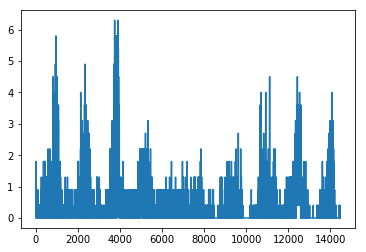

In [18]:
df['Wind Speed'].plot()

In [19]:
df.set_index('DateTime1')

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
DateTime1,,,,,,,,,,,,,,,,,,,,,
2017-01-21 22:40:00,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:41:00,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2017-01-21 22:42:00,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:43:00,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:44:00,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1
2017-01-21 22:45:00,01-21-2017,22:45,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:46:00,01-21-2017,22:46,72.8,72.9,72.8,95,71.3,0.0,N,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1
2017-01-21 22:47:00,01-21-2017,22:47,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1
2017-01-21 22:48:00,01-21-2017,22:48,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,55,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1


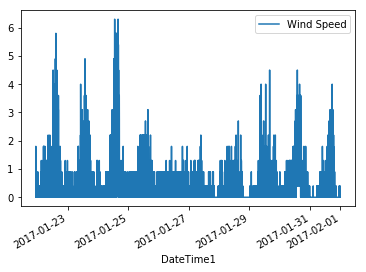

In [20]:
df.plot(x='DateTime1',y='Wind Speed')


In [21]:
df.drop("Date",axis=1,inplace=True)
df.drop("Time",axis=1,inplace=True)
df.drop("Wind Dir",axis=1,inplace=True)
df.drop("Hi Dir",axis=1,inplace=True)

In [22]:
df

,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Run,Hi Speed,Wind Chill,Heat Index,...,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime1
0,72.8,72.8,72.8,95,71.3,0.4,0.03,1.8,72.8,75.6,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:40:00
1,72.8,72.8,72.8,95,71.3,0.9,0.05,2.2,72.8,75.6,...,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1,2017-01-21 22:41:00
2,72.8,72.8,72.8,95,71.3,1.8,0.11,3.1,72.8,75.6,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:42:00
3,72.8,72.9,72.8,95,71.3,0.9,0.05,2.7,72.8,75.6,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:43:00
4,72.8,72.9,72.8,95,71.3,0.4,0.03,0.9,72.8,75.6,...,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1,2017-01-21 22:44:00
5,72.9,72.9,72.8,95,71.4,0.0,0.00,0.4,72.9,75.7,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:45:00
6,72.8,72.9,72.8,95,71.3,0.0,0.00,1.8,72.8,75.6,...,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1,2017-01-21 22:46:00
7,72.9,72.9,72.8,95,71.4,0.0,0.00,0.4,72.9,75.7,...,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1,2017-01-21 22:47:00
8,72.9,72.9,72.9,95,71.4,0.4,0.03,0.9,72.9,75.7,...,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1,2017-01-21 22:48:00
9,72.9,72.9,72.9,95,71.4,0.4,0.03,1.3,72.9,75.7,...,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1,2017-01-21 22:49:00


In [23]:
df=df.set_index('DateTime1')


In [24]:
df

,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Run,Hi Speed,Wind Chill,Heat Index,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
DateTime1,,,,,,,,,,,,,,,,,,,,,
2017-01-21 22:40:00,72.8,72.8,72.8,95,71.3,0.4,0.03,1.8,72.8,75.6,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:41:00,72.8,72.8,72.8,95,71.3,0.9,0.05,2.2,72.8,75.6,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2017-01-21 22:42:00,72.8,72.8,72.8,95,71.3,1.8,0.11,3.1,72.8,75.6,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:43:00,72.8,72.9,72.8,95,71.3,0.9,0.05,2.7,72.8,75.6,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:44:00,72.8,72.9,72.8,95,71.3,0.4,0.03,0.9,72.8,75.6,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1
2017-01-21 22:45:00,72.9,72.9,72.8,95,71.4,0.0,0.00,0.4,72.9,75.7,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:46:00,72.8,72.9,72.8,95,71.3,0.0,0.00,1.8,72.8,75.6,...,55,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1
2017-01-21 22:47:00,72.9,72.9,72.8,95,71.4,0.0,0.00,0.4,72.9,75.7,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1
2017-01-21 22:48:00,72.9,72.9,72.9,95,71.4,0.4,0.03,0.9,72.9,75.7,...,55,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1


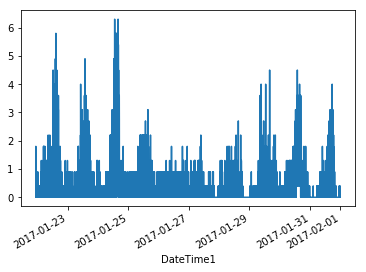

In [25]:
df['Wind Speed'].plot()

In [26]:
df.values.shape

(14463, 34)

In [27]:
target_names = ['Hi Temp']

In [28]:
shift_days = 1
shift_steps = shift_days * 24  

In [29]:
df_targets = df[target_names].shift(-shift_steps)

In [30]:

df[target_names].head(shift_steps + 5)

,Hi Temp
DateTime1,
2017-01-21 22:40:00,72.8
2017-01-21 22:41:00,72.8
2017-01-21 22:42:00,72.8
2017-01-21 22:43:00,72.9
2017-01-21 22:44:00,72.9
2017-01-21 22:45:00,72.9
2017-01-21 22:46:00,72.9
2017-01-21 22:47:00,72.9
2017-01-21 22:48:00,72.9


In [31]:
df_targets.head(5)

,Hi Temp
DateTime1,
2017-01-21 22:40:00,72.9
2017-01-21 22:41:00,72.9
2017-01-21 22:42:00,72.9
2017-01-21 22:43:00,72.9
2017-01-21 22:44:00,72.9


In [32]:
df_targets.tail()

,Hi Temp
DateTime1,
2017-01-31 23:56:00,NaN
2017-01-31 23:57:00,NaN
2017-01-31 23:58:00,NaN
2017-01-31 23:59:00,NaN
2017-02-01 00:00:00,NaN


In [33]:
x_data = df.values[0:-shift_steps]

In [34]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (14439, 34)


In [35]:
y_data = df_targets.values[:-shift_steps]

In [36]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (14439, 1)


In [37]:
num_data = len(x_data)
num_data

14439

In [38]:
train_split = 0.9

In [39]:
num_train = int(train_split * num_data)
num_train

12995

In [40]:
num_test = num_data - num_train
num_test

1444

In [41]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

14439

In [42]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

14439

In [43]:
num_x_signals = x_data.shape[1]
num_x_signals

34

In [44]:
num_y_signals = y_data.shape[1]
num_y_signals

1

In [45]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 1118.0


In [46]:
x_scaler = MinMaxScaler()

In [47]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [48]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000004


In [49]:
x_test_scaled = x_scaler.transform(x_test)

In [50]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [51]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(12995, 34)
(12995, 1)


In [52]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [53]:
batch_size = 16

In [54]:
sequence_length = 24 *  4
sequence_length

96

In [55]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [56]:
x_batch, y_batch = next(generator)

In [57]:
print(x_batch.shape)
print(y_batch.shape)

(16, 96, 34)
(16, 96, 1)


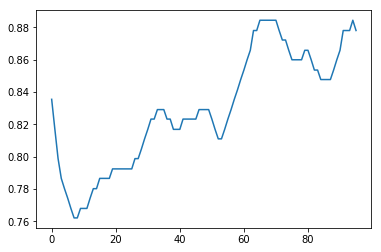

In [58]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

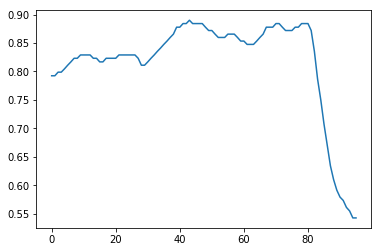

In [59]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [60]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [61]:
model = Sequential()

In [62]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

In [63]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [64]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [65]:
warmup_steps = 50

In [66]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [67]:
optimizer = RMSprop(lr=1e-3)

In [68]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer,metrics=['accuracy'])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         840192    
_________________________________________________________________
dense (Dense)                (None, None, 1)           513       
Total params: 840,705
Trainable params: 840,705
Non-trainable params: 0
_________________________________________________________________


In [70]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [71]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [72]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [73]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [74]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [ ]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)